# Analysis of OULAD

##### In this notebook, we have merged, analyzed, and performed operations on the studentAssessment.csv and studentInfo.csv datasets from Open University Learning Analytics Dataset (OULAD).

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
st_assess = pd.read_csv("OULAD/studentAssessment.csv")
st_info = pd.read_csv("OULAD/studentInfo.csv")

In [3]:
st_merge = pd.merge(st_assess, st_info, on = "id_student")
st_merge = st_merge[(st_merge["highest_education"] != "No Formal quals") & 
                    st_merge["highest_education"] != "Post Graduate Qulification"]

st_merge["Passed"] = st_merge["final_result"] == "Pass"

st_merge = st_merge[((st_merge["score"] >= 40) & (st_merge["Passed"]==True)) | 
                    ((st_merge["score"] < 40) & (st_merge["Passed"]==False))]

query_imd = re.compile(r"([0-9]+)-.+")
st_merge["imd_band"] = st_merge["imd_band"].str.extract(query_imd).astype(float)
st_merge["Economic Status"] = st_merge["imd_band"] < 50.00

st_merge = st_merge[st_merge["age_band"] == "0-35"]
st_merge.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,Passed,Economic Status
15,1752,32885,26,0,69.0,AAA,2013J,F,West Midlands Region,Lower Than A Level,50.0,0-35,0,60,N,Pass,True,False
17,1754,32885,124,0,63.0,AAA,2013J,F,West Midlands Region,Lower Than A Level,50.0,0-35,0,60,N,Pass,True,False
19,1756,32885,222,0,75.0,AAA,2013J,F,West Midlands Region,Lower Than A Level,50.0,0-35,0,60,N,Pass,True,False
25,1752,45462,20,0,70.0,AAA,2013J,M,Scotland,HE Qualification,30.0,0-35,0,60,N,Pass,True,True
26,1753,45462,54,0,65.0,AAA,2013J,M,Scotland,HE Qualification,30.0,0-35,0,60,N,Pass,True,True


In [4]:
st_merge.to_csv('merged_info_assess.csv', index=False)

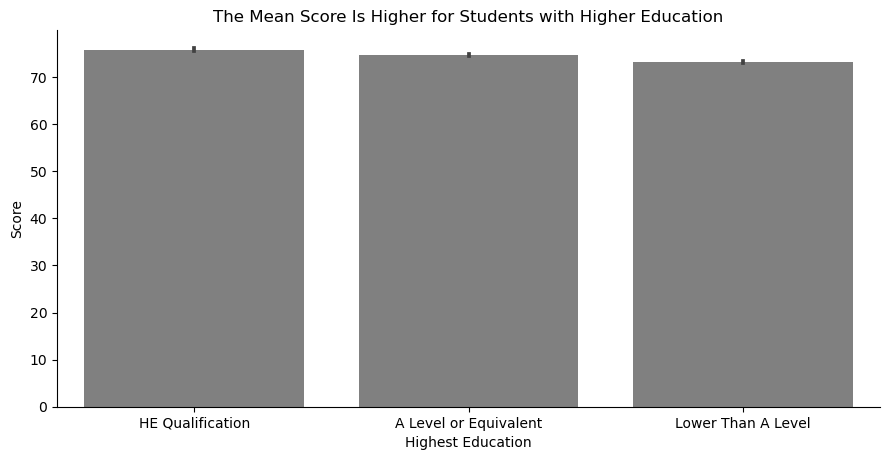

In [5]:
ed_comp = sns.catplot(data=st_merge, x="highest_education", y="score", kind="bar", aspect = 2, height = 4.5,
                      order=["HE Qualification", "A Level or Equivalent", "Lower Than A Level"],
                      color="gray")
ed_comp.set(ylabel="Score")
ed_comp.set(xlabel="Highest Education")
plt.title("The Mean Score Is Higher for Students with Higher Education")
plt.show()

In [6]:
ed_p1 = stats.ttest_ind(st_merge[st_merge["highest_education"]=="HE Qualification"]["score"], 
                        st_merge[st_merge["highest_education"]=="A Level or Equivalent"]["score"], equal_var=False)[1]

ed_p2 = stats.ttest_ind(st_merge[st_merge["highest_education"]=="A Level or Equivalent"]["score"], 
                        st_merge[st_merge["highest_education"]=="Lower Than A Level"]["score"], equal_var=False)[1]

print("p-value for HE Qual and A Level or Equivalent: ", ed_p1)
print("p-value for A Level and Lower Than A Level: ", ed_p2)

p-value for HE Qual and A Level or Equivalent:  4.3684804547454956e-10
p-value for A Level and Lower Than A Level:  5.515709832487307e-22


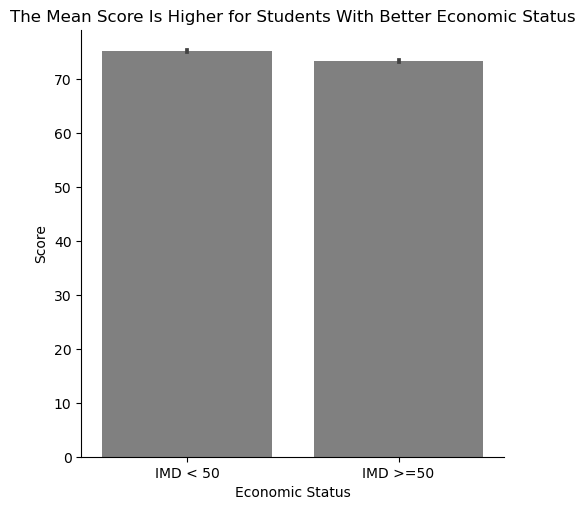

In [7]:
econ_comp = sns.catplot(data=st_merge, x="Economic Status", y="score", kind="bar", aspect = 1, height = 5, color="gray")
econ_comp.set(ylabel="Score")
econ_comp.set_xticklabels(["IMD < 50", "IMD >=50"])
plt.title("The Mean Score Is Higher for Students With Better Economic Status")
plt.show()

In [8]:
econ_p = stats.ttest_ind(st_merge[st_merge["Economic Status"]==False]["score"], 
                st_merge[st_merge["Economic Status"]==True]["score"], equal_var=False)[1]
print("p-value for economic difference in percentage of students who passed: ", econ_p)

p-value for economic difference in percentage of students who passed:  5.114778730603173e-45


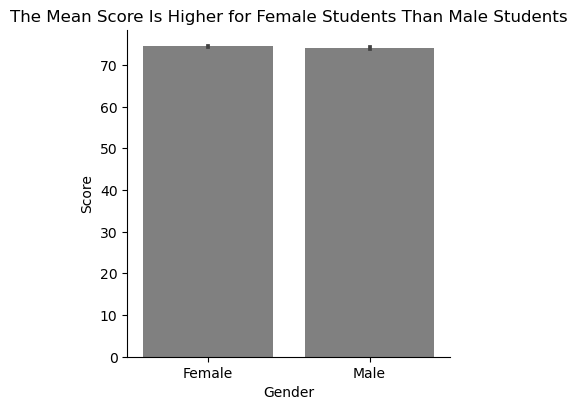

In [9]:
gen_comp = sns.catplot(data=st_merge, x="gender", y="score", kind="bar", aspect = 1, height = 4, color="gray")
gen_comp.set(xlabel="Gender", ylabel="Score")
gen_comp.set_xticklabels(["Female", "Male"])
plt.title("The Mean Score Is Higher for Female Students Than Male Students")
plt.show()

In [10]:
gender_p = stats.ttest_ind(st_merge[st_merge["gender"]=="F"]["score"], st_merge[st_merge["gender"]=="M"]["score"],
                           equal_var=False)[1]
print("p-value for gender difference in score: ", gender_p)

p-value for gender difference in score:  0.001502062625763814
